In [1]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [2]:
# Get S&P
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period='max')

In [3]:
sp500 = sp500.drop(['Dividends', 'Stock Splits'], axis=1)

In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-11-05 00:00:00-05:00', '2024-11-06 00:00:00-05:00',
               '2024-11-07 00:00:00-05:00', '2024-11-08 00:00:00-05:00',
               '2024-11-11 00:00:00-05:00', '2024-11-12 00:00:00-05:00',
               '2024-11-13 00:00:00-05:00', '2024-11-14 00:00:00-05:00',
               '2024-11-15 00:00:00-05:00', '2024-11-18 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24338, freq=None)

<Axes: xlabel='Date'>

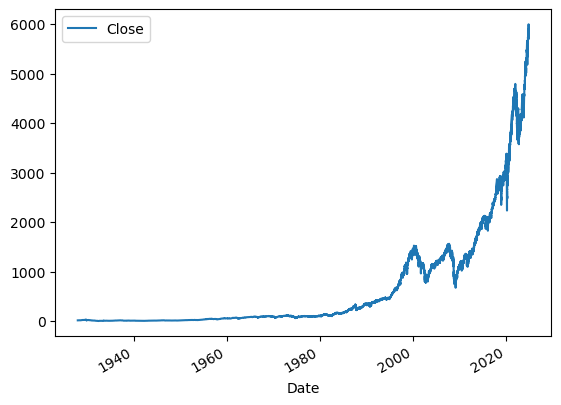

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5870.620117


In [7]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5870.620117,0


In [9]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5870.620117,0


Machine Learning Time

In [10]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# We can't use Cross-Referencing in Timeseries data.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
preds = model.predict(test[predictors])

In [12]:
preds = pd.Series(preds, index=test.index)

In [13]:
preds

Date
2024-06-28 00:00:00-04:00    0
2024-07-01 00:00:00-04:00    1
2024-07-02 00:00:00-04:00    0
2024-07-03 00:00:00-04:00    0
2024-07-05 00:00:00-04:00    0
                            ..
2024-11-12 00:00:00-05:00    0
2024-11-13 00:00:00-05:00    0
2024-11-14 00:00:00-05:00    0
2024-11-15 00:00:00-05:00    0
2024-11-18 00:00:00-05:00    0
Length: 100, dtype: int32

In [14]:
precision_score(test["Target"], preds)

0.7142857142857143

In [15]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

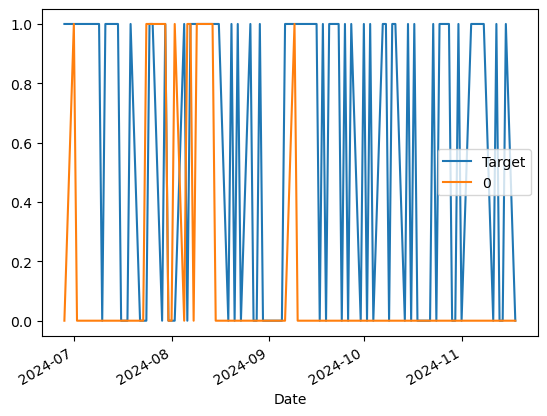

In [16]:
combined.plot()

Building a backtesting system

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [35]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,1.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-11-11 00:00:00-05:00,0,0.0
2024-11-12 00:00:00-05:00,1,0.0
2024-11-13 00:00:00-05:00,0,0.0


In [24]:
predictions["Predictions"].value_counts()

0    3667
1    2621
Name: Predictions, dtype: int64

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288057993132392

In [26]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535782
0    0.464218
Name: Target, dtype: float64

Adding additional predictors

In [27]:
horizons = [2,4,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [28]:
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_4,Trend_4,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.997507,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.996134,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999687,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.005877,2.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003225,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0,1.000484,2.0,1.004451,4.0,1.050171,34.0,1.143238,148.0,1.349436,529.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1,0.998552,1.0,0.999248,3.0,1.045987,33.0,1.138640,147.0,1.344806,528.0
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0,1.000116,1.0,0.998968,3.0,1.045048,34.0,1.137620,147.0,1.344385,529.0


In [30]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

0.0    4375
1.0     912
Name: Predictions, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5592105263157895

Next steps and Summary I guess